#### Importing libraries

In [25]:
# importing libraries
import pandas as pd
import numpy as np
import os
# importing visualization libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly
# importing ml libraries
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Importing data

In [26]:
# importing supply chain data
path = r'C:\Users\Richárd\Desktop\CareerFoundry\Data Immersion\Achievement 6\project\Data'
supply_chain = pd.read_pickle(os.path.join(path, 'clean_formatted_supply_chain.pkl'))

In [27]:
supply_chain.columns

Index(['type', 'shipping_days_real', 'shipping_days_scheduled',
       'profit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'market', 'order_city',
       'order_country', 'order_date', 'order_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_region', 'order_state',
       'order_status', 'product_id_card', 'product_name', 'product_price',
       'product_status', 'shipping_date', 'shipping_mode'],
      dtype='object')

#### Cleaning

In [94]:
# checking for missing values - none found
supply_chain.isnull().sum()

type                        0
shipping_days_real          0
shipping_days_scheduled     0
profit_per_order            0
sales_per_customer          0
delivery_status             0
late_delivery_risk          0
category_id                 0
category_name               0
customer_city               0
customer_country            0
customer_id                 0
customer_segment            0
customer_state              0
department_id               0
department_name             0
market                      0
order_city                  0
order_country               0
order_date                  0
order_id                    0
order_item_discount         0
order_item_discount_rate    0
order_item_id               0
order_item_profit_ratio     0
order_item_quantity         0
sales                       0
order_region                0
order_state                 0
order_status                0
product_id_card             0
product_name                0
product_price               0
product_st

In [96]:
# checking duplicates - none found
duplicates = supply_chain.duplicated()
duplicates.shape

(180519,)

<AxesSubplot: xlabel='profit_per_order', ylabel='Count'>

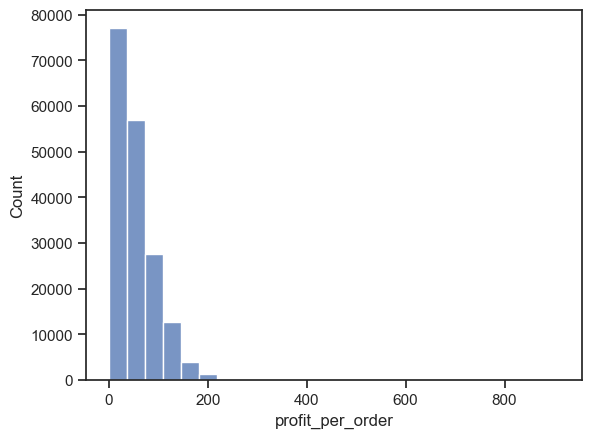

In [100]:
# checking for extreme values
sns.histplot(supply_chain['profit_per_order'], bins=25)
# everything seems to be within reason

<AxesSubplot: xlabel='product_price', ylabel='Count'>

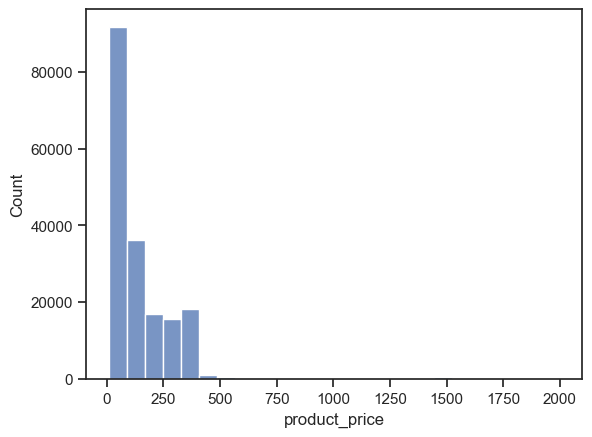

In [101]:
sns.histplot(supply_chain['product_price'], bins=25)
# similarly nothing crazy going on here

In [102]:
# checking some summary statistics
supply_chain[['product_price', 'profit_per_order']].describe()

,product_price,profit_per_order
count,180519.000000,180519.000000
mean,141.232550,53.449547
std,139.732492,44.745482
min,9.990000,0.000000
25%,50.000000,21.570000
50%,59.990002,43.480000
75%,199.990005,73.940000
max,1999.989990,911.800000


In [103]:
supply_chain[['product_price', 'profit_per_order']].median()

product_price       59.990002
profit_per_order    43.480000
dtype: float64

In [104]:
supply_chain[['product_price', 'profit_per_order']].mode()
# profit of 0 is somewhat strange, but not out of the realm of possibility

,product_price,profit_per_order
0,59.990002,0.0


#### Data exploration

<AxesSubplot: xlabel='product_price', ylabel='profit_per_order'>

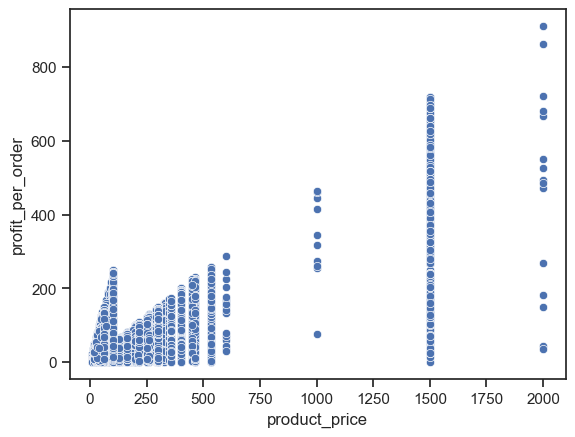

In [97]:
# visualizing how much price affects profit
sns.set(style="ticks")
sns.scatterplot(x = 'product_price', y = 'profit_per_order', data = supply_chain)

#### Hypothesis
*the higher the price of the product, the more profit it makes on an order-by order basis*

In [82]:
# Reshaping the variables into NumPy arrays
X = supply_chain['product_price'].values.reshape(-1,1)
y = supply_chain['profit_per_order'].values.reshape(-1,1)

In [83]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [84]:
# running linear regression on data
# setting up regression object
regression = LinearRegression()

In [85]:
# training the regression model
regression.fit(X_train, y_train)

LinearRegression()

In [86]:
# Predicting the values of y using X.

y_prediction = regression.predict(X_test)

Text(0, 0.5, 'profit per order')

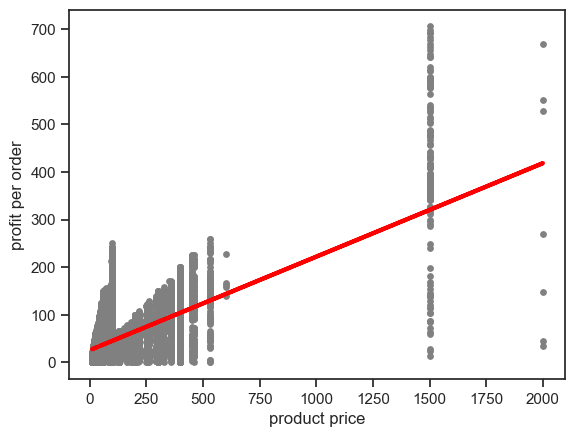

In [89]:
# visualizing the prediction
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_prediction, color='red', linewidth =3)
plot_test.xlabel('product price')
plot_test.ylabel('profit per order')

#### Interpretation
- the model got the very general trend right, but the relation is certainly not linear
- there are likely other factors influencing overall profit gainedb

In [90]:
# Model summary statistics.

r_mean_squared_error = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

In [91]:
print('regression coefficent: ', regression.coef_, 'mean squared error: ', r_mean_squared_error, 'r2 score:', r2)

regression coefficent:  [[0.19633972]] mean squared error:  1253.6748674227902 r2 score: 0.3718737839713354


In [92]:
# Creating df comparing the actual and predicted values

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_prediction.flatten()})
data.head(50)

,Actual,Predicted
0,42.19,35.490976
1,48.72,64.939971
2,144.31,104.205952
3,47.52,104.205952
4,16.87,35.487049
5,2.16,51.196191
6,139.81,95.786904
7,1.98,64.939971
8,54.14,51.196191
9,80.61,35.487049


#### Reflections
- the linear regression model did not perform very well, especially the mean squared error is *very* high
- this likely means that there are other, more important factors that effect the profit
Bias considerations:
- The dataset is definitively large enough for modeling
- since the data is based around individual orders made, it is based on human decision, which is inherently biased
- the data covers a large enough timeframe
- Among the columns there are certainly some that are based on human imput, so that could also be a source of bias